<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_S6_SSHA.ipynb"><< Sentinel-6 sea surface height anomalies</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_8_S6_WS.ipynb">Sentinel-6 wind speed >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<div class="alert alert-block alert-success">
<h3>Learn Sentinel-6: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **<a href="1_1a_S6_data_access_SFTP.ipynb" target="_blank">1_1a_S6_data_access_SFTP</a>**; this will download the required Sentinel-6 products for this notebook.

</div>
<hr>

# 1.7 Sentinel-6 significant wave heights


### Data used

| Product Description  | Data Store collection ID| Product Navigator | 
|:--------------------:|:-----------------------:|:-------------:|
| Sentinel-6 Poseidon-4 Altimetry level-2 High Resolution (NTC) | EO:EUM:DAT:0128 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:0128?query=Altimetry%20NTC&filter=satellite__Sentinel-6&results=20&s=advanced" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know;
* How to read significant wave height data from Sentinel-6 level-2 altimetry files.
* How plot significant wave height data using appropriate flags.

### Outline

The signals obtained from satellite altimetry measurements contain information not just about the mean sea-level over time, but also information on the roughness of the current sea surface as a result of wave activity. As such, the significant wave height can be derived - this is defined as "the average wave height, from trough to crest, of the highest one-third of the waves". It is derived from the leading edge slope of the altimetry waveform. In general a smaller leading edge slope is related to higher significant wave height.

In this notebook, we'll take a look at how to plot this data from a Sentinel-6 altimetry level-2 product.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Reading Sentinel-6 level-2 SWH data](#section1)
 2. [Plotting Sentinel-6 level-2 SWH data](#section2)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import cartopy
import cmocean
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
import warnings
import glob

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Reading Sentinel-6 level-2 SWH data
[Back to top](#TOC_TOP)

</div>

As in the previous notebooks in this series, we will use a Sentinel-6 level-2 altimetry file here. For this instance we only need to open the standard measurement file.

In [2]:
# selecting SAFE directories
SAFE_product = glob.glob(os.path.join(os.getcwd(), 'products','S6A_P4_2__HR*_NT_*','*.nc'))[0]

In [3]:
# read data
ds_01 = xr.open_dataset(SAFE_product, group="data_01")
ds_01_ku = xr.open_dataset(SAFE_product, group="data_01/ku")
ds_01.close()
ds_01_ku.close()

In preparation for plotting the data, we will also read in the relevant flag information for the significant wave height product. In this case this is the "swh_ocean_qual" and "surface_classification_flag" fields.

In [4]:
flags_swh = np.array(ds_01_ku.swh_ocean_qual).astype(float)
flags_sc = np.array(ds_01.surface_classification_flag).astype(float)
valid_vals = np.where((flags_swh == 0.0) & (flags_sc == 0.0))

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Plotting Sentinel-6 level-2 SWH data
[Back to top](#TOC_TOP)

</div>

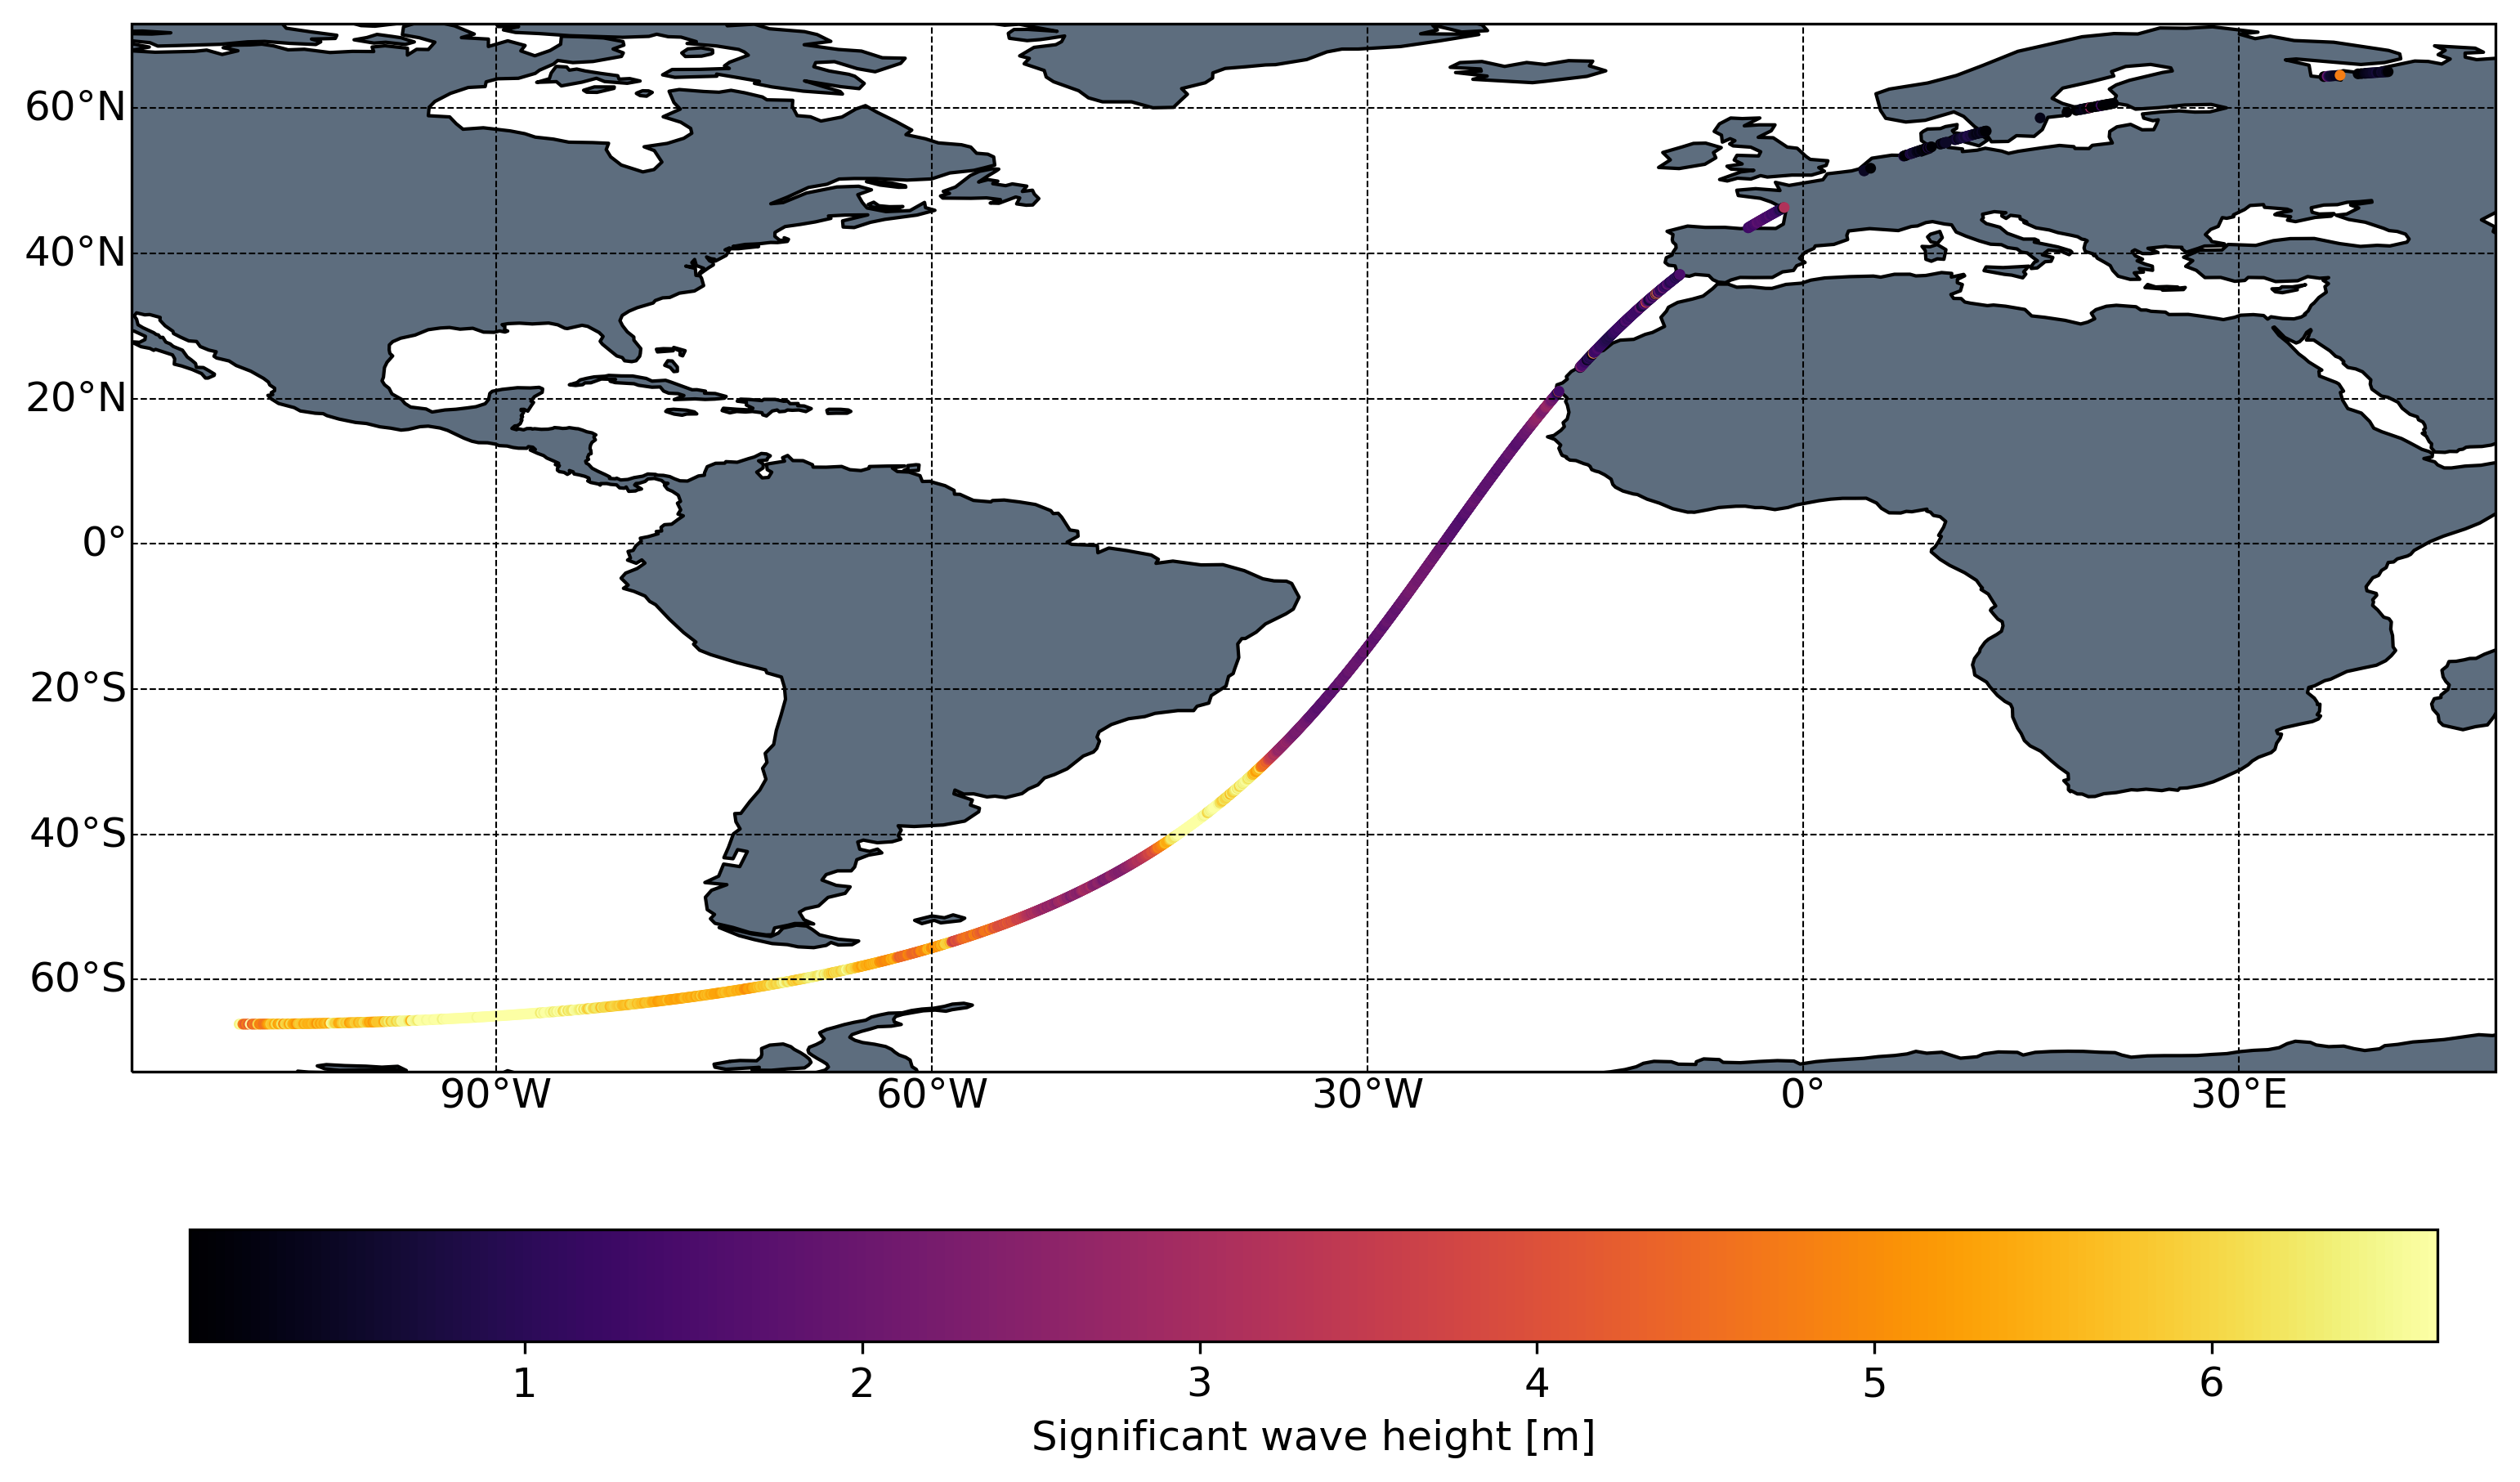

In [5]:
# plot the flagged track data for geophysical variables
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

vmin = np.nanpercentile(ds_01_ku.swh_ocean, 5)
vmax = np.nanpercentile(ds_01_ku.swh_ocean, 95)
f1 = m.scatter(ds_01.longitude[valid_vals], ds_01.latitude[valid_vals],
               c=ds_01_ku.swh_ocean[valid_vals], s=10, cmap="inferno", marker='o', edgecolors=None, 
               linewidth=0.0, vmin=vmin, vmax=vmax)

m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'color': 'black'}
g1.ylabel_style = {'color': 'black'}
m.set(facecolor = "1.0")
m.set_aspect(0.5)

cbar = plt.colorbar(f1, ax=m, orientation="horizontal", fraction=0.05, pad=0.07)
cbar.set_label('Significant wave height [m]')

plt.tight_layout()
plt.savefig('1_7_S6_SWH.png')

In the figure above you can see that the significant wave heights vary along the track. You can also see some higher values in the southern ocean around 50-60 degrees south, another area that is typically very windy, and thus often has high wave action. In the next notebook we'll look at wind speed.

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_6_S6_SSHA.ipynb"><< Sentinel-6 sea surface height anomalies</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_8_S6_WS.ipynb">Sentinel-6 wind speed >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>